# Ejercicios Pair Programming - Modulo 3 - Sprint 1 
## Lección 6 - Estandarización
### Pilar García Murillo y Sonia Ruiz Pérez

En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.

En vuestro dataset habréis identificado unas variables predictoras y una variable respuesta. Los objetivos del pair programming de hoy son:

- Sobre las variables predictoras, en este caso deberéis estandarizar estas variables. De nuevo, usad el método que prefiráis.
- Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings

In [53]:
# Importamos las librerías necesarias.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
pd.options.display.max_columns=None   #Para que se muestren todas las columnas de los dataframes.

In [54]:
#Creamos un dataframe con el csv de los datos de nuestro estudio.
df=pd.read_csv('files/taxis2_norm.csv',index_col=0)
df.head(3)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,tip_no_zeros,tip_box
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2.150000e+00,0.787753
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,1.000000e-10,-10.996744
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2.360000e+00,0.886769


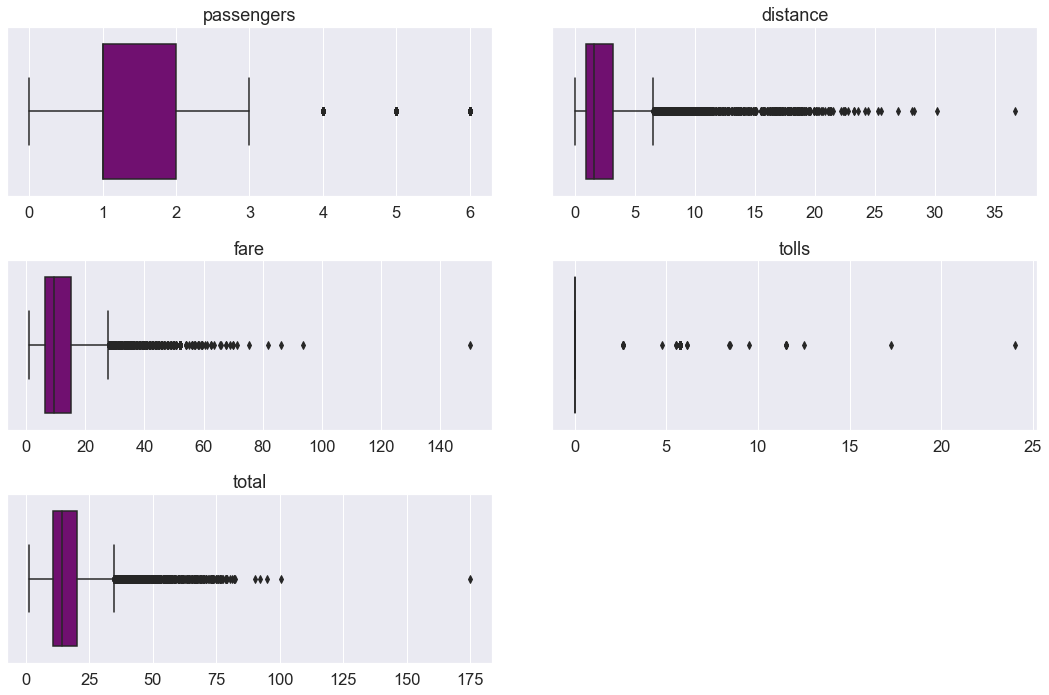

In [55]:
# Vamos a representar visualmente las 5 variables predictoras (independientes) numéricas
#  para ver sus outliers: 
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
sns.set(font_scale=1.5)

# Aplanamos la figura así solo utilizar índices unidimensionalmente.
axes = axes.flat

#Creamos una lista con las columnas que nos interesan.
lista_col_numericas = ["passengers", "distance", "fare", "tolls", "total"]

#Iteramos por la lista de las columnas que nos interesan y representamos sus datos.
for i, columna in enumerate(lista_col_numericas):
    sns.boxplot(data=df, x=columna, ax=axes[i],color='purple')

    #Ponemos título a cada gráfico y eliminamos su etiqueta en el eje X.
    axes[i].set_title(columna)
    axes[i].set_xlabel("")

#Ajustamos las gráficas para que no se solapen sus etiquetas.
fig.tight_layout()

#Eliminamos la última gráfica ya que está vacía, pues solo tenemos 5 columnas que representar.
fig.delaxes(axes[-1])

plt.show();

`Visualmente nos cercioramos que nuestras variables tienen un número elevado de outliers, por lo que decidimos aplicar el método de estandarización Sklearn RobustScaler.`

In [56]:
#En primer lugar nos creamos un dataframe solo con las variables numéricas.
df_numericas=df.select_dtypes(include=np.number)
df_numericas.head()

,passengers,distance,fare,tip,tolls,total,tip_no_zeros,tip_box
0,1,1.60,7.0,2.15,0.0,12.95,2.150000e+00,0.787753
1,1,0.79,5.0,0.00,0.0,9.30,1.000000e-10,-10.996744
2,1,1.37,7.5,2.36,0.0,14.16,2.360000e+00,0.886769
3,1,7.70,27.0,6.15,0.0,36.95,6.150000e+00,1.945321
4,3,2.16,9.0,1.10,0.0,13.40,1.100000e+00,0.095650


In [57]:
#Solo seleccionamos nuestras variables predictoras (independientes), por tanto eliminamos las demás.
df_numericas.drop(['tip','tip_no_zeros','tip_box'],axis=1,inplace=True)
df_numericas.head(3)

,passengers,distance,fare,tolls,total
0,1,1.60,7.0,0.0,12.95
1,1,0.79,5.0,0.0,9.30
2,1,1.37,7.5,0.0,14.16


In [58]:
#Creamos el modelo escalador.
robust=RobustScaler()

In [59]:
#Ajustamos el modelo a nuestras columnas numéricas.
robust.fit(df_numericas)

RobustScaler()

In [60]:
#Transformamos los datos.
x_robust=robust.transform(df_numericas)

In [61]:
#Convertimos el array obtenido a dataframe.
df_numericas_robust=pd.DataFrame(x_robust,columns=df_numericas.columns)
df_numericas_robust.head(3)

,passengers,distance,fare,tolls,total
0,0.0,-0.022624,-0.294118,0.0,-0.127368
1,0.0,-0.389140,-0.529412,0.0,-0.511579
2,0.0,-0.126697,-0.235294,0.0,0.000000


In [62]:
#Comprobamos la estandarización.
for columna in df_numericas_robust.columns:
    print(f'La media de la columna {columna} es: {df_numericas_robust[columna].mean()}')
    print(f'La desviación estándar de la columna {columna} es: {df_numericas_robust[columna].std()}')
    print('---------')

La media de la columna passengers es: 0.5440782211007728
La desviación estándar de la columna passengers es: 1.2079475342976138
---------
La media de la columna distance es: 0.609822165737451
La desviación estándar de la columna distance es: 1.6831561402421893
---------
La media de la columna fare es: 0.39858010890841117
La desviación estándar de la columna fare es: 1.2614411027086787
---------
La media de la columna tolls es: 0.3147926194606529
La desviación estándar de la columna tolls es: 1.3691744416915255
---------
La media de la columna total es: 0.4368698279368189
La desviación estándar de la columna total es: 1.3631963142673766
---------


`Vemos que la media de todas las variables se acerca bastante a 0, y que la desviación estandar se acerca a bastante a 1, ya que el proceso de estandarización consiste en ello.`

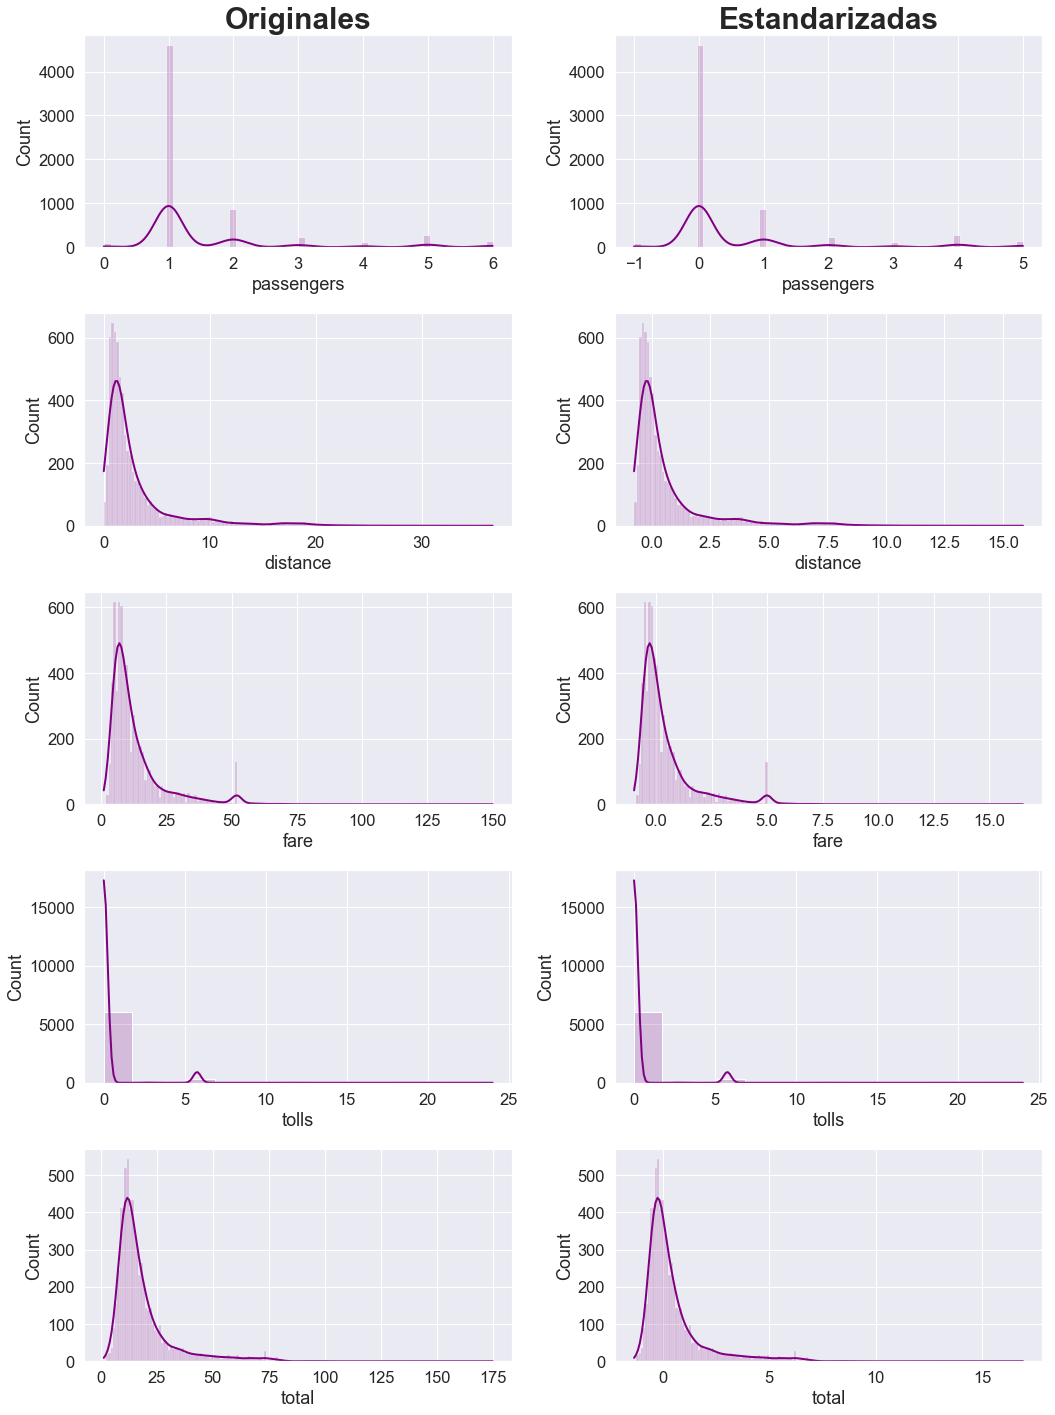

In [63]:
#Representamos las variables numéricas antes de estandarizar junto con las variables ya estandarizadas.
fig,axes=plt.subplots(nrows=5,ncols=2,figsize=(15,20))

#Creamos una lista con los nombres de las columnas.
columnas_robust=df_numericas_robust.columns

#Iteramos por la lista de las columnas y representamos sus datos.
for i,col in enumerate(columnas_robust):
    sns.histplot(data=df_numericas,x=col,kde=True,line_kws={'linewidth':2},alpha=0.2,ax=axes[i][0],color='purple')
    axes[i][0].set_xlabel(col)
axes[0][0].set_title('Originales', fontsize=30,fontweight='bold')

for i,col in enumerate(columnas_robust):
    sns.histplot(data=df_numericas_robust,x=col,kde=True,line_kws={'linewidth':2},alpha=0.2,ax=axes[i][1],color='purple')
    axes[i][1].set_xlabel(col)
axes[0][1].set_title('Estandarizadas', fontsize=30,fontweight='bold')

#Ajustamos las gráficas para que no se solapen sus etiquetas.
fig.tight_layout()

`Al observar las gráficas podemos afirmar que los datos se han estandarizado, ya que si nos fijamos en los ejes x de cada gráfica vemos que sus unidades han cambiado.`

In [64]:
#Comprobamos las columnas que tenemos en el dataframe con las columnas estandarizadas.
df_numericas_robust.columns

Index(['passengers', 'distance', 'fare', 'tolls', 'total'], dtype='object')

In [65]:
#Renombramos las columnas estandarizadas.
dicc_cols_robust={'passengers':'passengers_robust', 'distance':'distance_robust', 'fare':'fare_robust',
                     'tolls':'tolls_robust', 'total':'total_robust'}

df_numericas_robust.rename(columns=dicc_cols_robust, inplace=True)

#Comprobamos que se han cambiado adecuadamente los nombres.
df_numericas_robust.columns

Index(['passengers_robust', 'distance_robust', 'fare_robust', 'tolls_robust',
       'total_robust'],
      dtype='object')

In [66]:
#Comprobamos el tamaño del dataframe 'df'.
df.shape

(6341, 16)

In [68]:
#Hacemos reset_index para evitar problemas con los índices al juntar los dataframes.
df.reset_index(inplace=True)

In [73]:
#Eliminamos la columna del índice generado.
df.drop(['index'],axis=1,inplace=True)

In [74]:
#Verificamos que se ha eliminado la columna generada como 'index'.
df.shape

(6341, 16)

In [70]:
#Comprobamos el tamaño del dataframe 'df_numericas_robust'.
df_numericas_robust.shape

(6341, 5)

In [71]:
#Hacemos reset_index para evitar problemas con los índices al juntar los dataframes.
df_numericas_robust.reset_index(inplace=True)

In [75]:
#Eliminamos la columna del índice generado.
df_numericas_robust.drop(['index'],axis=1,inplace=True)

In [76]:
#Verificamos que se ha eliminado la columna generada como 'index'.
df_numericas_robust.shape

(6341, 5)

In [78]:
#Juntamos dataframes.
df_unido=pd.concat([df,df_numericas_robust],axis=1)
df_unido.head(3)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,tip_no_zeros,tip_box,passengers_robust,distance_robust,fare_robust,tolls_robust,total_robust
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,2.150000e+00,0.787753,0.0,-0.022624,-0.294118,0.0,-0.127368
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,1.000000e-10,-10.996744,0.0,-0.389140,-0.529412,0.0,-0.511579
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,2.360000e+00,0.886769,0.0,-0.126697,-0.235294,0.0,0.000000


In [79]:
#Comprobamos que ha hecho la unión correctamente manteniendo las filas, pero sumando las columnas.
df_unido.shape

(6341, 21)

In [ ]:
#Guardamos el dataframe en un csv.
df_unido.to_csv('files/taxis3_estandar.csv')

**Happy coding** 📈📊📉